In [95]:
from importlib import reload
import methods
import warnings
import pickle

import pandas as pd

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

import seaborn as sns

from daps import detrend_timeseries

In [3]:
reload(methods)
from methods import *

In [4]:
#get the list of proteins names from the 'pdb' directory of protein structures

directory = 'lrrpredictor_pdbs'
filenames = get_files_with_ext(directory, '.pdb')
protlist = [os.path.splitext(file)[0] for file in filenames]

In [15]:
df = pd.read_excel('LRRPredictor_validation.xlsx', skiprows = 9)

record_l = []
motifs_d = {}

with open("fasta/validation.fasta", 'w') as handle:
    for ii in range(178):
        pdbid = df['PDB ID + chain'][2*ii]
        record_l.append(SeqRecord(Seq(df['entry'][2*ii]), id = pdbid, description = ''))
        motifs = df['entry'][2*ii+1]
        motifs_d[pdbid] = [jj for jj, let in enumerate(motifs) if let != '-']
        # record.seq = Seq(df['PDB ID + chain'][2*ii])


In [17]:
motifs_d

{'1A9NA': [19, 42, 64, 88, 113, 140],
 '1H6UA': [42, 64, 86, 108, 130, 152, 174, 196, 218],
 '1IO0A': [18, 47, 75, 103, 133],
 '1JL5A': [38, 58, 78, 98, 120, 140, 162, 182, 204, 224, 244],
 '1O6VA': [45, 67, 89, 111, 133, 155, 176, 198, 220, 242],
 '1OGQA': [51, 77, 102, 126, 150, 175, 198, 222, 245],
 '1OZNA': [12, 33, 57, 81, 106, 130, 154, 178, 202, 226, 254],
 '1P9AG': [11, 32, 56, 78, 101, 125, 149, 173, 196],
 '1PGVA': [16, 45, 73, 101, 132],
 '1W8AA': [9, 30, 55, 79, 103, 127],
 '1WWLA': [5, 28, 65, 92, 118, 146, 170, 198, 225, 250],
 '1XEUA': [42, 64, 86, 107, 129, 151, 173],
 '1XKUA': [11, 32, 56, 80, 101, 125, 151, 172, 196, 220, 243],
 '1ZIWA': [2, 23, 47, 71, 95, 119, 143, 169, 193, 220, 246],
 '2ASTB': [42, 65, 88, 113, 137, 163, 190, 217, 242],
 '2BNHA': [24, 52, 81, 109, 138, 166, 195, 223, 252],
 '2CA6A': [0, 33, 61, 95, 123, 160, 188, 217, 245, 275, 304, 333],
 '2ELLA': [25, 50, 72, 96, 121, 148],
 '2FT3A': [10, 31, 55, 79, 100, 124, 149, 170, 194, 218, 241],
 '2ID5A':

In [42]:
#computes the discrepancy of a protein and shows plot of the grid

discrep_d = {}

for ii, protid in enumerate(motifs_d):
    fileid = str(ii)+protid.replace(' ', '')
    preX = get_backbone_from_pdb(f'{directory}/{fileid}.pdb')

    winding, s, c, q, dx = get_winding(preX)
    a, b = 0, preX.shape[0]

    motifs = motifs_d[protid]
                      
    if not motifs:
        continue

    verticals = np.array([p for p in motifs if a <= p <= b])
    lrr_heights = winding[verticals]
    k = len(lrr_heights)

    u = 1 + np.zeros(k)
    v = np.arange(0.0, k)

    v -= (u @ v) / (u @ u) * u
    z = (lrr_heights @ u) / (u @ u) * u + (lrr_heights @ v) / (v @ v) * v
    diff = np.sign(np.mean(z[1:] - z[:-1]))
    projected = diff * v + (z @ u) / (u @ u) * u
    discrep = np.mean((projected - lrr_heights) ** 2)
    # hs = np.arange(int(min(winding[a:b])) + g, int(max(winding[a:b]))) + g
    hs = projected
    # vs = np.array(motifs_d[protid])
    vs = np.array(verticals)
    ext_vs = set(motifs_d[protid]) - set(vs)
    # plt.hlines(hs, xmin = a, xmax = b, color = 'purple', ls = '--')

    discrep_d[protid] = discrep

    plt.hlines(projected, xmin = a, xmax = b, color = 'purple', ls = '--')

    for vert in vs:
        plt.axvline(vert, color = 'orange', ls = '--')
    for vert in ext_vs:
        plt.axvline(vert, color = 'red', ls = '--')
        
    plt.axvline(a, color = 'black')
    plt.axvline(b, color = 'black')
    plt.plot(winding)
    plt.title(f'LRR Discrep: {discrep:.6}')
    plt.savefig(make_path('plot', 'discrep', f'{protid}.png'))
    plt.close()
    continue
    plt.show()
    

In [41]:
[(k,v) for k, v in discrep_d.items() if v>.5]

[('2Q4GW', 0.6127747476531458),
 ('3A79B', 0.7300736219506856),
 ('3SB4A', 2.630056477380334),
 ('4ECOA ', 0.8702005824529797)]

(array([ 2., 22., 26., 16., 30., 15., 11., 38.,  3.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00493592, 0.03118712, 0.05743833, 0.08368953, 0.10994074,
        0.13619194, 0.16244315, 0.18869436, 0.21494556, 0.24119677,
        0.26744797, 0.29369918, 0.31995038, 0.34620159, 0.3724528 ,
        0.398704  , 0.42495521, 0.45120641, 0.47745762, 0.50370882,
        0.52996003, 0.55621123, 0.58246244, 0.60871365, 0.63496485,
        0.66121606, 0.68746726, 0.71371847, 0.73996967, 0.76622088,
        0.79247208, 0.8187

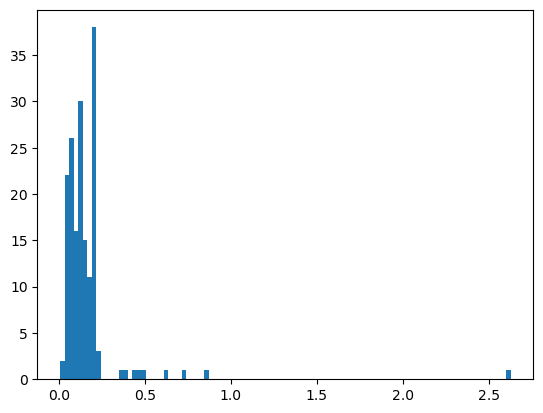

In [38]:
plt.hist(discrep_d.values(), bins = 100)

In [43]:
with open('pickles/discrep_d_valid.pickle', 'wb') as handle:
    pickle.dump(discrep_d, handle)

In [44]:
with open('pickles/discrep_d_athaliana.pickle', 'rb') as handle:
    discrep_d_athaliana = pickle.load(handle)

In [48]:
penguins = sns.load_dataset("penguins")

In [51]:
list(discrep_d.values())

[0.06820791049299386,
 0.13138010827054794,
 0.041976882885711865,
 0.19855117693390525,
 0.16158943666332273,
 0.11620036786330262,
 0.1922500311228071,
 0.132796550197185,
 0.040638167517026764,
 0.060041781157594946,
 0.20501538825748167,
 0.08185825390824078,
 0.20520662889476407,
 0.20921130080827305,
 0.14016887144695256,
 0.12719296227228444,
 0.4609180943732066,
 0.07765712814990687,
 0.20814481722041933,
 0.21237737022492673,
 0.04158182414430649,
 0.08154151829875589,
 0.12891292149834171,
 0.07370200799850424,
 0.10115627559903717,
 0.10275059830093078,
 0.6127747476531458,
 0.041820679823608334,
 0.0680636480111326,
 0.0848541464132997,
 0.08098705293289528,
 0.05942255702490331,
 0.11314483605310616,
 0.18275470634960578,
 0.16663312077316664,
 0.16479627507178754,
 0.19139777905494146,
 0.20268638259490077,
 0.2087401279362422,
 0.2050808167169478,
 0.20281631044161585,
 0.7300736219506856,
 0.20907862024156432,
 0.18530733744806474,
 0.20495638517997303,
 0.0462631291970

In [70]:
val = list(discrep_d.values())
at = list(discrep_d_athaliana.values())
discrep_df = pd.DataFrame(data={'Discrepancy': val+at, 'Protein dataset': ['Validation']*len(val)+['NLRome']*len(at)})

In [71]:
discrep_df

,Discrepancy,Protein dataset
0,0.068208,Validation
1,0.131380,Validation
2,0.041977,Validation
3,0.198551,Validation
4,0.161589,Validation
...,...,...
343,0.285139,NLRome
344,0.940444,NLRome
345,0.185481,NLRome
346,0.221766,NLRome


In [81]:
pd.DataFrame({"Percentile": [10.0*ii for ii in range(11)], 'Validation':[np.percentile(val, ii*10) for ii in range(11)], 'NLRome':[np.percentile(at, ii*10) for ii in range(11)]})

,Percentile,Validation,NLRome
0,0.0,0.004936,0.077350
1,10.0,0.042493,0.222920
2,20.0,0.068869,0.262909
3,30.0,0.086828,0.280893
4,40.0,0.112465,0.308677
5,50.0,0.127209,0.372872
6,60.0,0.146298,0.472518
7,70.0,0.183043,0.594334
8,80.0,0.199848,0.728614
9,90.0,0.208691,1.059210


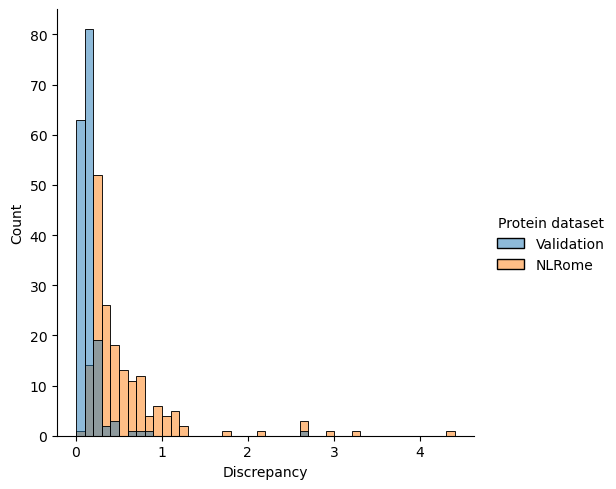

In [73]:
# fig, ax = plt.subplots()
sns.displot(discrep_df, binwidth=.1, kde=False, x = 'Discrepancy', hue='Protein dataset')

# ax.set_xlim([0, 5])

In [85]:
motifs = motifs_d[protid]

int(np.mean(np.diff(motifs)))

23

In [94]:
#compute graph laplacian eigenvectors
for ii, protid in enumerate(motifs_d):
    fileid = str(ii)+protid.replace(' ', '')

    motifs = motifs_d[protid]
    
    diff = np.diff(motifs)
    if not list(diff):
        continue
    period = int(np.mean(diff))

    #truncate protein
    X = get_backbone_from_pdb(f'{directory}/{fileid}.pdb')
    X = get_curv_vectors(X, MaxOrder=1, sigma=1)[1]
    # np.save(make_path('npy', 'nlrome_X', '%s.npy'%tairid), X)        
    #print out the number of residues in the chain, and print the locations of the LRR motif residues
    D = get_csm(X, X)
    # Clean up the matrix a bit by doing a sliding window of length roughly the period
    D = sliding_window(D, period)
    # Clean up the matrix even more by binarizing it with nearest neighbors
    B = csm_to_binary_mutual(D, 50)
    #B = B[0:400, 0:400]
    v = getUnweightedLaplacianEigsDense(1-B)

    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.imshow(D, cmap='magma_r')
    plt.title("Self-Similarity Matrix")
    plt.subplot(132)
    plt.imshow(B)
    plt.title("Binarized Self-Similarity Matrix")
    plt.subplot(133)
    plt.imshow(v[:, 0:29], aspect='auto', cmap='magma_r', interpolation='none')
    for motif in motifs:
        motif -= a
        if motif in range(v.shape[0]):
            plt.axhline(motif)
    plt.title("Eigenvectors of Unweighted Graph Laplacian")
    plt.savefig(make_path('plot','eigenmatrix_valid', '%s.png'%protid))
    plt.close()
    np.save(make_path('npy', 'eigenmatrix_valid', '%s.npy'%protid), v)
    continue
    plt.show()

In [103]:
for protid in motifs_d:
    motifs = motifs_d[protid]
    if len(motifs)<2:
        continue
    period = 25
    v = np.load('npy/eigenmatrix_valid/%s.npy'%protid)
    s = v[:,0]
    c = v[:,1]
    sf = detrend_timeseries(s, period)
    cf = detrend_timeseries(c, period)

    theta = np.arctan2(cf, sf)
    # plt.figure(figsize=(12, 4))
    # plt.plot(theta, label=f'{eig1}, {eig2}')

    # phases = []
    # for res in motifs_l:
    #     if res in range(len(theta)):
    #         plt.plot(res, theta[res], 'bo')
    #         phases.append(theta[res])

    plt.figure(figsize=(12, 4))
    plt.title(f"Estimated phase for LRR of {protid}")
    plt.ylabel('Angle')
    plt.xlabel('LRR coil residue number')

    plt.plot(theta)

    for res in motifs:
        res -= a
        if res in range(len(theta)):
            plt.plot(res, theta[res], 'ro')
    # plt.show()
    # break

    plt.savefig(make_path('plot', 'phase_estimation_valid', f'{protid}.png'))
    plt.close()


In [109]:
[(k,v) for k, v in discrep_d.items() if v > 0.208691]

[('1ZIWA', 0.20921130080827305),
 ('2CA6A', 0.4609180943732066),
 ('2ID5A', 0.21237737022492673),
 ('2Q4GW', 0.6127747476531458),
 ('2Z7XB', 0.2087401279362422),
 ('3A79B', 0.7300736219506856),
 ('3B2DA', 0.20907862024156432),
 ('3G06A', 0.24017339283696695),
 ('3O6NA', 0.2202149109811563),
 ('3RG1A', 0.21091330015616483),
 ('3SB4A', 2.630056477380334),
 ('3T6QA', 0.20979186000612923),
 ('3TSRE', 0.48102395467250836),
 ('4B8CD', 0.4472167654806218),
 ('4ECOA ', 0.8702005824529797),
 ('4Q62A', 0.3620921077869714),
 ('4XGOA', 0.3781650701616641),
 ('6OBPC', 0.23598207362164034)]

In [104]:
# #sliding window of l2 distance. need to move some of this to methods.py

# swl2_d = {}

# s = v[:,0]
# c = v[:,1]

# winding, swl2, slope = get_winding_swl2(s,c)
# # bins = np.linspace(min(swl2), max(swl2), 100)
# # scores = np.digitize(swl2, bins, 100)/100

# offset = np.mean(winding - slope*np.arange(len(winding)))

# plt.figure(figsize=(12, 6))
# plt.subplot(311)
# plt.plot(s)
# plt.plot(c)
# plt.title("Leading eigenvectors for %s"%protid)
# plt.subplot(312)
# plt.plot(winding)
# plt.plot(slope*np.arange(len(winding))-offset, c = 'grey', linestyle = '--')
# plt.title("Winding number vs median slope")
# plt.subplot(313)
# plt.plot(swl2)
# plt.title("Sliding window L2 distance")    
# plt.tight_layout()            

# plt.show()

# # plt.savefig(make_path('plot', 'swl2', f'{protid}.png'))
# # plt.close()
